<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_08_diferenciacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculo de derivadas


## Diferencias finitas de primer orden
El método de diferencias finitas aproxima derivadas numéricamente.

- Aproximación de primer orden hacia adelante:

\begin{equation}
      f'(x_k) \approx \frac{f(x_{k+1}) - f(x_k)}{h}
\end{equation}

- Aproximación de primer orden hacia atrás:

\begin{equation}
      f'(x_k) \approx \frac{f(x_k) - f(x_{k-1})}{h}
\end{equation}

\begin{equation}
\text{Error} = \frac{h}{2} f''(\xi)
\end{equation}

donde $x$ está entre $x_k$ y $x_{k+1}$.
## Diferencias finitas de segundo orden, diferencia central

Utilizando la fórmula de Taylor de segundo grado:
\begin{equation}
f(x) = f(x_k) + f'(x_k)(x - x_k) + \frac{f''(x_k)}{2}(x - x_k)^2 + R_2
\end{equation}

Evaluando en $x = x_{k+1}$ y $x = x_{k-1}$:
\begin{equation}
f(x_{k+1}) = f(x_k) + f'(x_k)h + \frac{f''(x_k)}{2}h^2 + O(h^3)
\end{equation}

\begin{equation}
f(x_{k-1}) = f(x_k) - f'(x_k)h + \frac{f''(x_k)}{2}h^2 + O(h^3)
\end{equation}

Restando estas ecuaciones y despejando $f'(x_k)$:

\begin{equation}
f'(x_k) \approx \frac{f(x_{k+1}) - f(x_{k-1})}{2h}
\end{equation}

El error de truncamiento es:
\begin{equation}
\text{Error} = \frac{h^2}{6} f'''(\xi)
\end{equation}

donde $\xi$ está entre $x_{k-1}$ y $x_{k+1}$.


# Actividad

1. Construya una función que permita calcular la derivada de una funcion empleando el metodo de diferencias centrales para aproximar el cálculo de la derivada con la función:

$y=e^{x^2}\sin x $

Compruebe  su solución empleando la derivada de sympy.

Analice que  pasa con la derivada cuando varia el valor de h.






In [46]:
# Librerias
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd

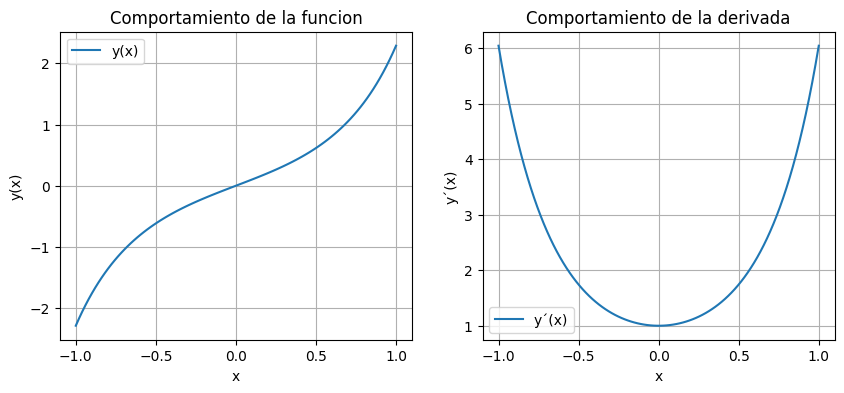

In [47]:
# Definimos la funcion que queremos derivar y un rango donde la derivaremos
y = lambda x: np.exp(x**2)*np.sin(x)
x = np.linspace(-1, 1, 100)

# Definimos la funcion para realizar el metodo de diferencias centrales
def diff_c(f, x, h):
  """
  Esta funcion emplea el metodo de diferencias centrales para el calculo de la derivada
  Input:
    f: Funcion para el calculo de la derivada
    x: Punto en el que realizaremos el calculo
    h: diferencias dx
  OutpuT: Derivada

  """
  d = (f(x+h)-f(x-h))/(2*h)

  return d

# Calculamos la derivada
d = diff_c(y, x, 1e-2)

# Graficamos el comportamiento de la funcion y su derivada obtenida
fig, axs = plt.subplots(figsize = (10, 4), ncols = 2, nrows = 1)
ax = axs.flatten()
ax[0].set_title('Comportamiento de la funcion')
ax[0].plot(x, y(x), label = 'y(x)')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y(x)')
ax[0].legend()
ax[0].grid()

ax[1].set_title('Comportamiento de la derivada')
ax[1].plot(x, d, label = 'y´(x)')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y´(x)')
ax[1].legend()
ax[1].grid()

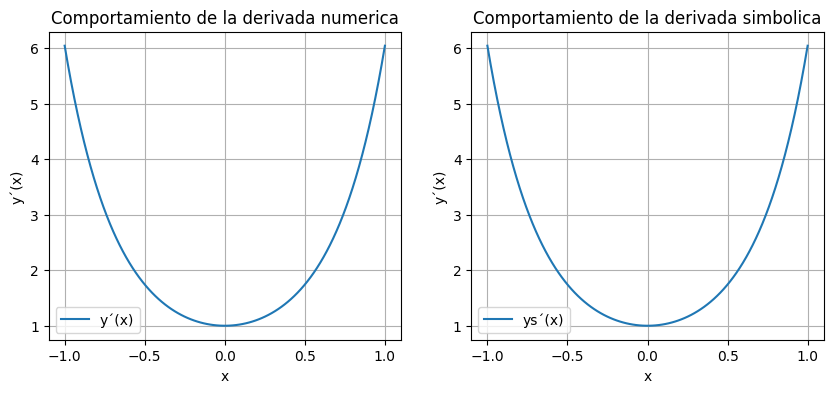

In [48]:
# Definimos la funcion simbolicamente
ys = lambda x: sp.exp(x**2)*sp.sin(x)
xs = sp.Symbol('x')

# Calculamos su derivada con sympy
ds = sp.diff(ys(xs), xs, 1)
dn = sp.lambdify(xs, ds, 'numpy')

# Comparamos la derivada obtenida numericamente con la obtenida simbolicamente
fig, axs = plt.subplots(figsize = (10, 4), ncols = 2, nrows = 1)
ax = axs.flatten()
ax[0].set_title('Comportamiento de la derivada numerica')
ax[0].plot(x, d, label = 'y´(x)')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y´(x)')
ax[0].legend()
ax[0].grid()

ax[1].set_title('Comportamiento de la derivada simbolica')
ax[1].plot(x, dn(x), label = 'ys´(x)')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y´(x)')
ax[1].legend()
ax[1].grid()

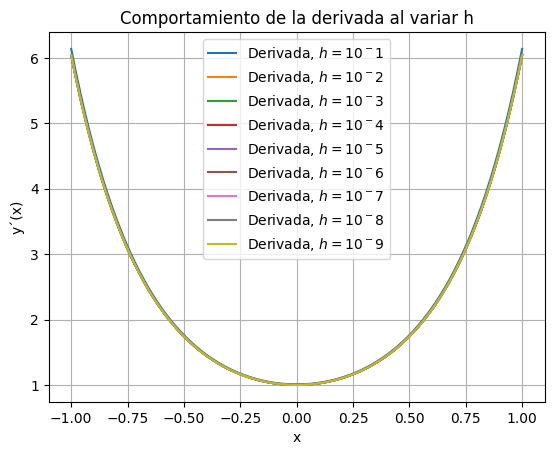

In [49]:
# Punto 3
# Variamos el valor de h y graficamos su comportamiento para cada h
for i in range(1, 10):
  h = 10**(-i)
  plt.title('Comportamiento de la derivada al variar h')
  plt.plot(x, diff_c(y, x, h), label = f'Derivada, $h = 10^{-i}$')
  plt.xlabel('x')
  plt.ylabel('y´(x)')
  plt.legend()
  plt.grid()

2. Construya una función que permita calcular el metodo de diferencias centrales derivada para los siguientes puntos experimentales, emplee una pandas.

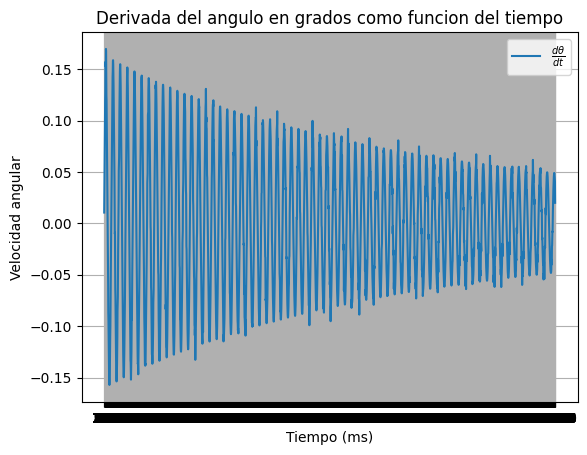

In [50]:
# Leemos los datos y los ponemos en un DataFrame
link = 'https://raw.githubusercontent.com/hernansalinas/autogradesMetodosComputacionales/main/Dataset/datos_pendulo.csv'
df = pd.read_csv(link, header = None)

# Definimos la funcion que calcule la derivada con el metodo de diferencias centrales para puntos
def diff_cp(a):
  x = np.array(a, dtype=float) # Volvemos un array de valores de tpo float
  d = np.zeros_like(x)

  h = 33 # Ya que hallaremos las derivadas respecto al tiempo, la separacion h entre los puntos es la separacion entre cada valor de tiempo que es 33

  d[0] = (x[1]-x[0])/(2*h) # Calculamos la derivada en el primer punto

  d[-1] = (x[-1]-x[-2])/(2*h) # Calculamos la derivada en el ultimo punto

  d[1:-1] = (x[2:]-x[:-2])/(2*h) # Calculamos la derivada para los demas puntos

  return d

# Eliminamos la primer fila del DataFrame para tener unicamente los valores numericos
dfn = df.drop(0)

# Calculamos las derivadas con recpecto al tiempo para los angulos en grados y radianes
dAD = diff_cp(dfn[2])
dAR = diff_cp(dfn[3])

plt.title('Derivada del angulo en grados como funcion del tiempo')
plt.plot(dfn[1], dAD, label = r'$\frac{dθ}{dt}$')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Velocidad angular')
plt.legend()
plt.grid()

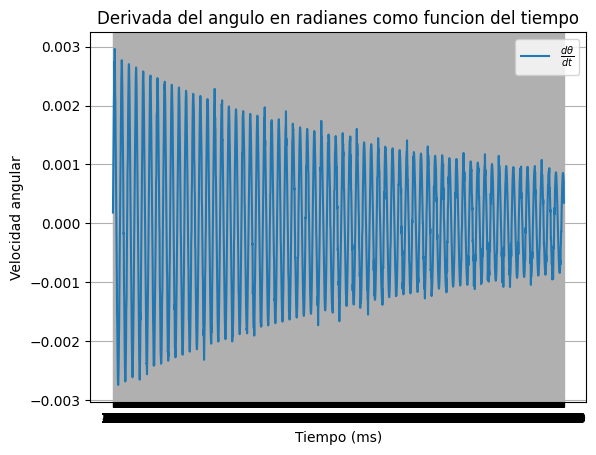

In [51]:
plt.title('Derivada del angulo en radianes como funcion del tiempo')
plt.plot(dfn[1], dAR, label = r'$\frac{dθ}{dt}$')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Velocidad angular')
plt.legend()
plt.grid()

3. El potencial eléctrico de un anillo de radio R, en la parte superior z del anillo viene dado por:


\begin{equation}
V = \frac{kq_{tot}}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para z>0 y R=0.1mm. Reescale el problema en unidades de $kq_{tot}$ empleando:

1. La librearia sympy.

2. Calcular el campo en el punto  $z = 0.1mm$ empleando el metodo np.grad

3. Calcular el campo para diferentes valores de z con z>0,,  empleando np.grad Construya un gráfico de E vs z.


La componente z del campo electrico esta dado por:

\begin{equation}
E = - \frac{\partial V}{\partial z}
\end{equation}

In [52]:
# Punto 1.
# Difinimos nuestras variables como simbolos de sympy
zs = sp.symbols('z')
R = 1e-4
ks = sp.symbols('k')
qd = sp.symbols('q_{tot}')

# Definimos V como una funcion de sympy
Vs = ks*qd / sp.sqrt(zs**2+R**2)

# Reescalamos en unidades de kqtot diviendo la expresion del campo por kqtot
Vr = Vs/(ks*qd)

# Calculamos Ez como la derivada simbolica de Vr
Es = -sp.diff(Vr, zs)


print(f'El campo electrico reescalado en unidades de kqtot esta dado por:')
Es

El campo electrico reescalado en unidades de kqtot esta dado por:


z/(z**2 + 1.0e-8)**(3/2)

In [53]:
# Punto 2
# Definimos V como una funcion de numpy para operar con ella
V = lambda z: 1/np.sqrt(z**2 + R**2)

# Definimos un rango de valores para poder usar np.gradient
zp = np.linspace(1e-4, 1e-3, 10000000)

# Calculamos E
Ep = -np.gradient(V(zp), zp)

print(f'El valor del campo en z = 0.1 mm es: E = {Ep[0]}')

El valor del campo en z = 0.1 mm es: E = 35355331.10593849


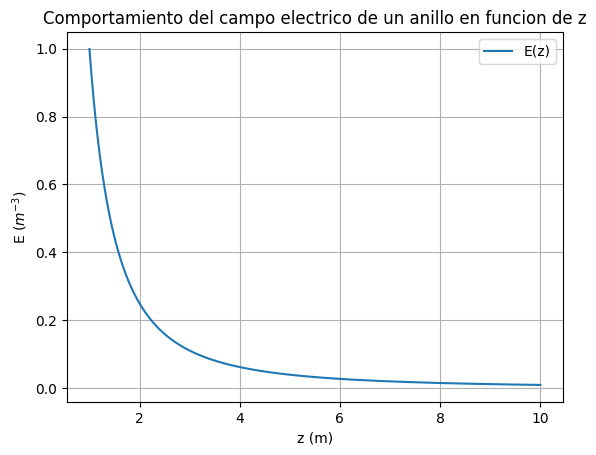

In [54]:
# Punto 3
# Definimos un nuevo rango para z
z = np.linspace(1, 10, int(1e4))

# Calculamos E para este nuevo rango
E = -np.gradient(V(z), z)

# Graficamos
plt.title('Comportamiento del campo electrico de un anillo en funcion de z')
plt.plot(z, E, label = 'E(z)')
plt.xlabel('z (m)')
plt.ylabel('E ($m^{-3}$)')
plt.legend()
plt.grid()

Podemos notar que el campo eléctrico decrece a medida que aumenta la distancia al anillo, lo cual concuerda con lo esperado.